<a href="https://colab.research.google.com/github/Kecasta/Clasificaci-n-De-Puntaje-Crediticio/blob/main/Clasificador_Puntaje_Crediticio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. PROCESAMOS LOS DATOS**

In [1]:
# Importamos las librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos y leemos nuestro conjunto de datos

datos = pd.read_csv('/content/Credit Score Classification Dataset.csv')
datos.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
datos.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [4]:
# verificamos si tenemos datos vacios o nulos

datos.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


<Axes: xlabel='Credit Score', ylabel='count'>

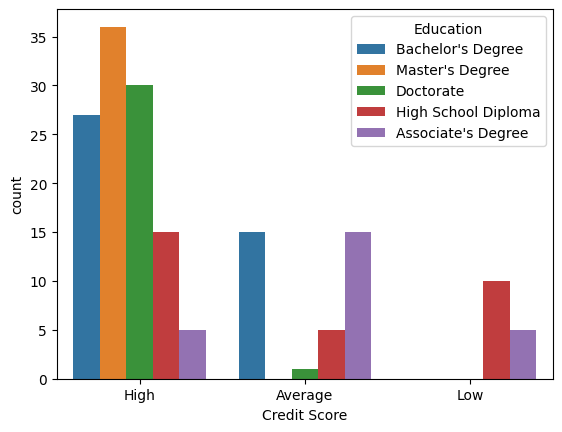

In [5]:
sns.countplot(x='Credit Score', data=datos, hue='Education')


<Axes: xlabel='Credit Score', ylabel='count'>

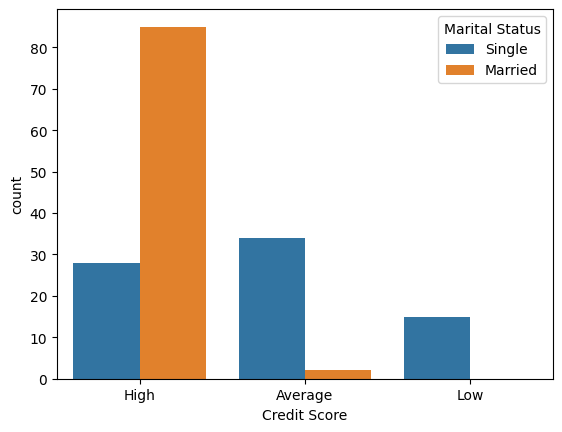

In [6]:
sns.countplot(x='Credit Score', data=datos, hue='Marital Status')

In [7]:
# tratamos con las variables categoricas Gender, Education, Marital Status, Home Ownership y Credit Score

dummies_Gender = pd.get_dummies(datos['Gender'], dtype=int)
dummies_Gender.head()



,Female,Male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [8]:
# Vamos a agregar la columna dummies_Gender a nuestro conjunto de datos

datos= datos.join(dummies_Gender)
datos= datos.drop('Gender', axis=1) # Quitamos la columna anterior de genero
datos.head()

,Age,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Female,Male
0,25,50000,Bachelor's Degree,Single,0,Rented,High,1,0
1,30,100000,Master's Degree,Married,2,Owned,High,0,1
2,35,75000,Doctorate,Married,1,Owned,High,1,0
3,40,125000,High School Diploma,Single,0,Owned,High,0,1
4,45,100000,Bachelor's Degree,Married,3,Owned,High,1,0


In [9]:
dummies_Education = pd.get_dummies(datos['Education'], dtype=int)
dummies_Education.head()


,Associate's Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [10]:
datos = datos.join(dummies_Education)
datos = datos.drop('Education', axis=1)
datos.head()

,Age,Income,Marital Status,Number of Children,Home Ownership,Credit Score,Female,Male,Associate's Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree
0,25,50000,Single,0,Rented,High,1,0,0,1,0,0,0
1,30,100000,Married,2,Owned,High,0,1,0,0,0,0,1
2,35,75000,Married,1,Owned,High,1,0,0,0,1,0,0
3,40,125000,Single,0,Owned,High,0,1,0,0,0,1,0
4,45,100000,Married,3,Owned,High,1,0,0,1,0,0,0


In [11]:
dummies_Marital_Status = pd.get_dummies(datos['Marital Status'], dtype=int)
dummies_Marital_Status.head()

,Married,Single
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [12]:
datos = datos.join(dummies_Marital_Status)
datos = datos.drop('Marital Status', axis=1)
datos.head()

,Age,Income,Number of Children,Home Ownership,Credit Score,Female,Male,Associate's Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree,Married,Single
0,25,50000,0,Rented,High,1,0,0,1,0,0,0,0,1
1,30,100000,2,Owned,High,0,1,0,0,0,0,1,1,0
2,35,75000,1,Owned,High,1,0,0,0,1,0,0,1,0
3,40,125000,0,Owned,High,0,1,0,0,0,1,0,0,1
4,45,100000,3,Owned,High,1,0,0,1,0,0,0,1,0


In [13]:
dummies_Home_Ownership = pd.get_dummies(datos['Home Ownership'], dtype=int)
dummies_Home_Ownership.head()

,Owned,Rented
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [14]:
datos = datos.join(dummies_Home_Ownership)
datos = datos.drop('Home Ownership', axis=1)
datos.head()

,Age,Income,Number of Children,Credit Score,Female,Male,Associate's Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree,Married,Single,Owned,Rented
0,25,50000,0,High,1,0,0,1,0,0,0,0,1,0,1
1,30,100000,2,High,0,1,0,0,0,0,1,1,0,1,0
2,35,75000,1,High,1,0,0,0,1,0,0,1,0,1,0
3,40,125000,0,High,0,1,0,0,0,1,0,0,1,1,0
4,45,100000,3,High,1,0,0,1,0,0,0,1,0,1,0


In [15]:
dummies_Credit_Score = pd.get_dummies(datos['Credit Score'], dtype=int)
dummies_Credit_Score.head()

,Average,High,Low
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [16]:
datos= datos.join(dummies_Credit_Score)
datos = datos.drop('Credit Score', axis=1)
datos.head()

,Age,Income,Number of Children,Female,Male,Associate's Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree,Married,Single,Owned,Rented,Average,High,Low
0,25,50000,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
1,30,100000,2,0,1,0,0,0,0,1,1,0,1,0,0,1,0
2,35,75000,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,40,125000,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,45,100000,3,1,0,0,1,0,0,0,1,0,1,0,0,1,0


<Axes: >

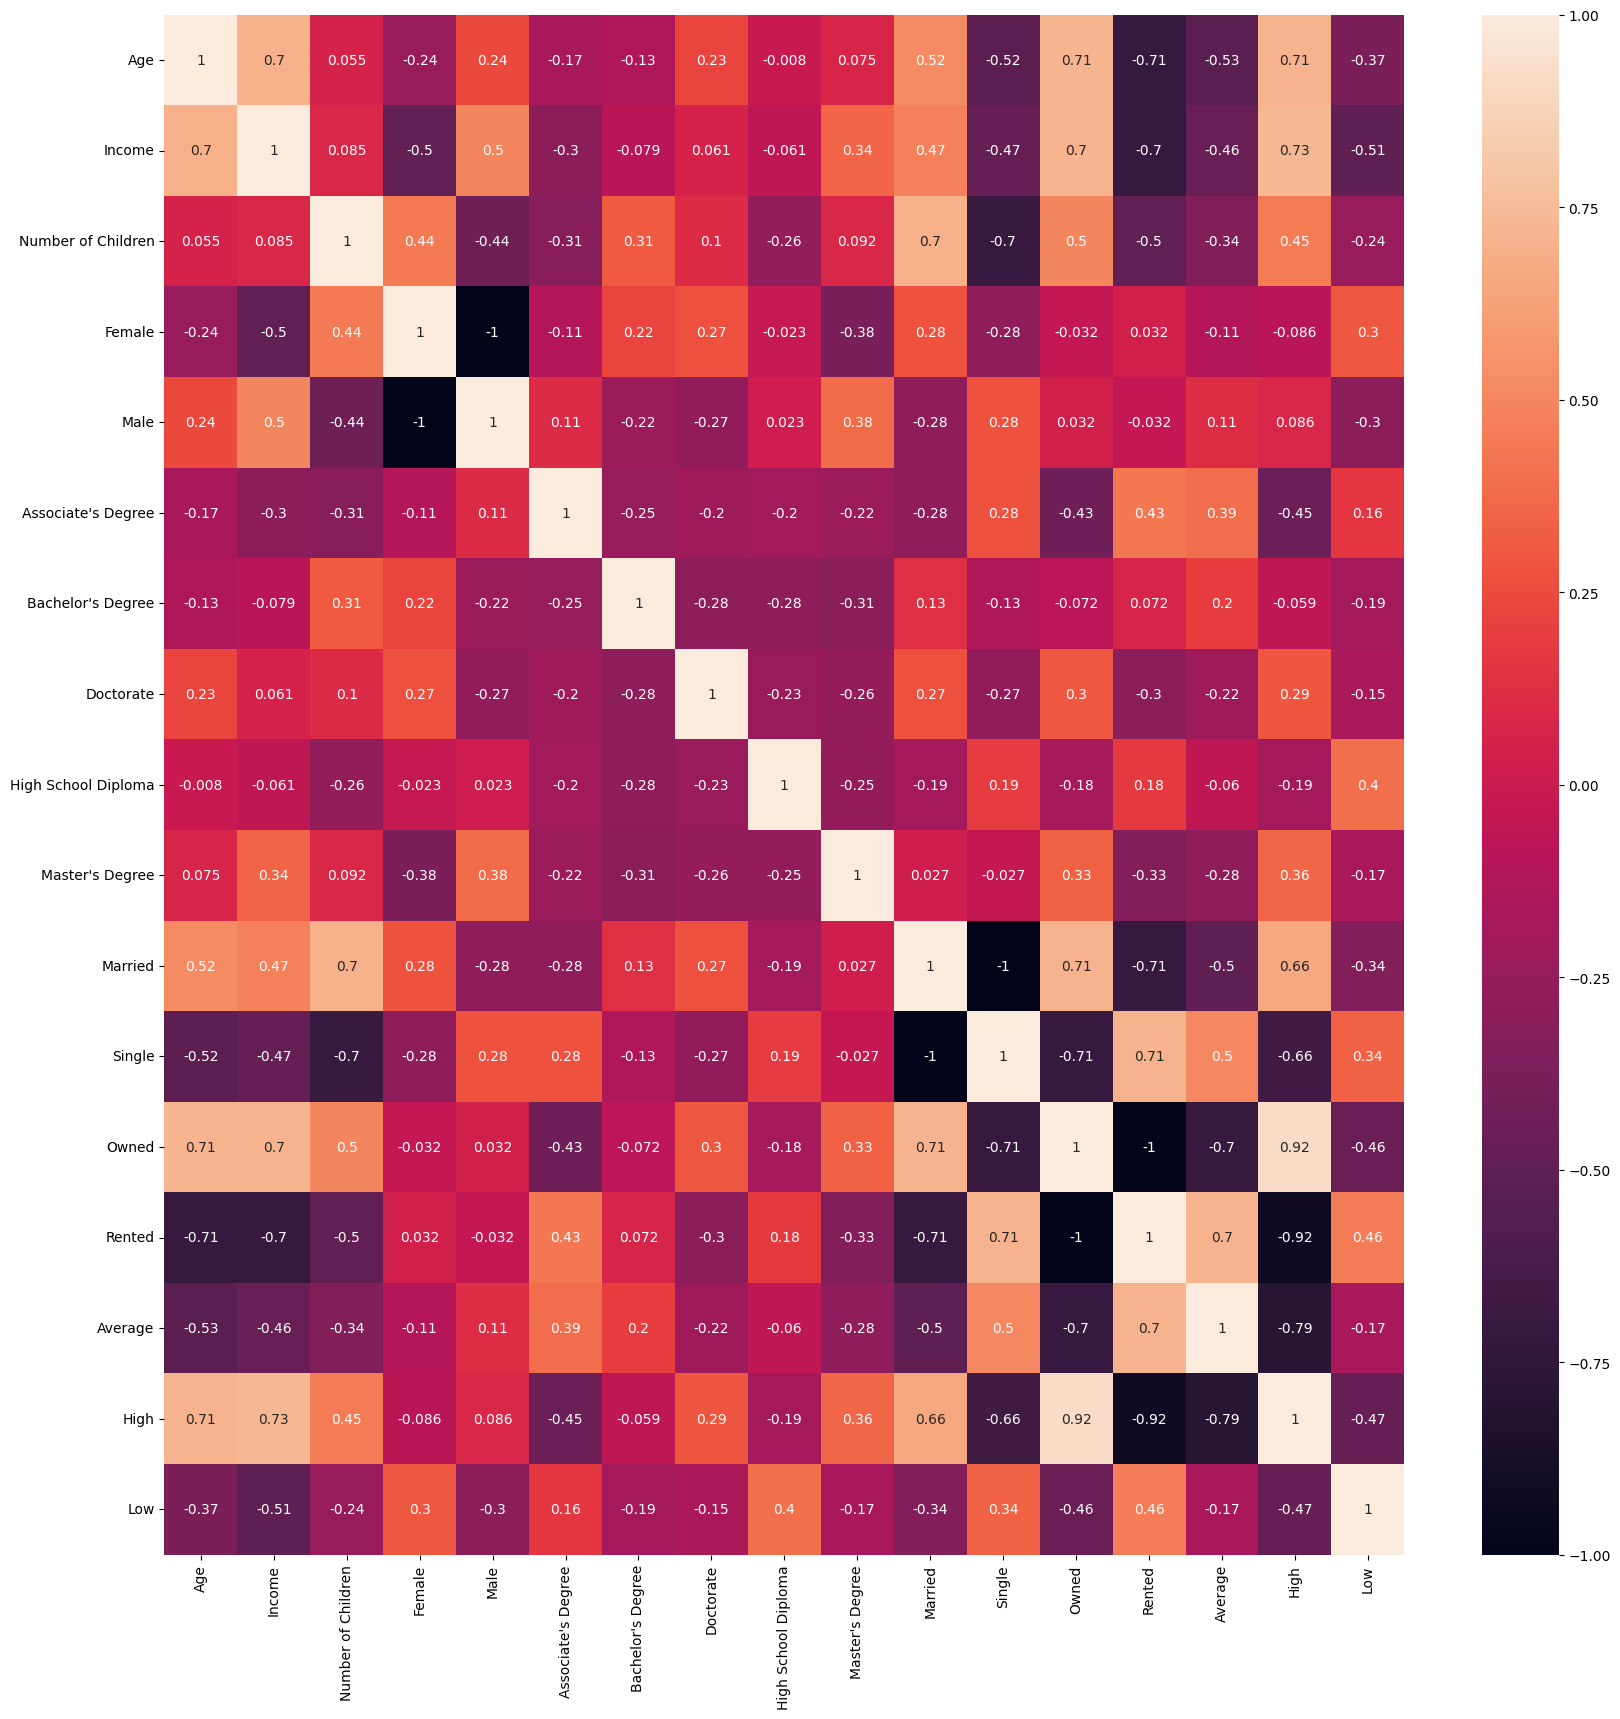

In [17]:
# buscamos la correlación

plt.figure(figsize=(20, 20)) # Create a figure with the desired size
sns.heatmap(datos.corr(), annot=True)


**2. Entrenamiento**


In [18]:
from sklearn.model_selection import train_test_split

X= datos.drop(['Average', 'High', 'Low'], axis=1)
y= datos[['Average', 'High', 'Low']]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [20]:
# Medimos la exactitud

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9393939393939394

In [21]:
# Volvemos a correr el modelo iterando en diferentes profundidades y escoger la mejor

resultados = []
for i in range(1,15):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  exactitud =accuracy_score(y_test, predictions)
  print(f'Exactitud para {i}: {exactitud}')
  resultados.append(exactitud)

Exactitud para 1: 0.9090909090909091
Exactitud para 2: 0.9393939393939394
Exactitud para 3: 1.0
Exactitud para 4: 0.9393939393939394
Exactitud para 5: 0.9393939393939394
Exactitud para 6: 0.9393939393939394
Exactitud para 7: 1.0
Exactitud para 8: 0.9393939393939394
Exactitud para 9: 1.0
Exactitud para 10: 0.9393939393939394
Exactitud para 11: 0.9393939393939394
Exactitud para 12: 1.0
Exactitud para 13: 0.9393939393939394
Exactitud para 14: 0.9393939393939394


<Axes: >

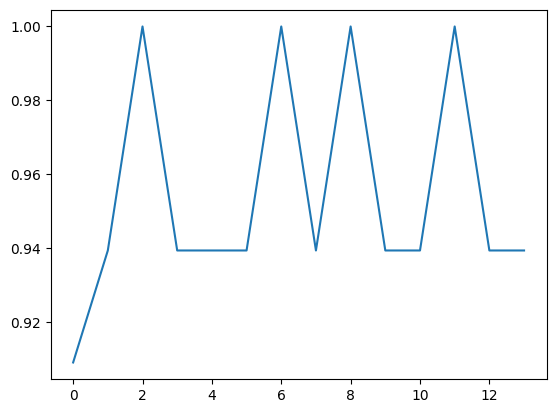

In [22]:
sns.lineplot(data=resultados)

In [23]:
cliente = pd.DataFrame({'Age':[32], 'Income':[55000],	'Number of Children':[0],	'Female':[1],	'Male':[0],	 "Associate's Degree":[0],	"Bachelor's Degree":[0], 'Doctorate':[1],	'High School Diploma':[0],	"Master's Degree":[0], 'Married':[0],	'Single':[1],	'Owned':[1],	'Rented':[0]})
cliente

,Age,Income,Number of Children,Female,Male,Associate's Degree,Bachelor's Degree,Doctorate,High School Diploma,Master's Degree,Married,Single,Owned,Rented
0,32,55000,0,1,0,0,0,1,0,0,0,1,1,0


In [24]:
prediccion_cliente=model.predict(cliente)
(prediccion_cliente)

array([[0, 1, 0]])